In [1]:
from datasets import load_dataset, load_from_disk

# data_path = "/home/jlpang/QualityDPO/datasets/ultrafeedback_sorted_score_diff_60917"
# data_path = "/home/jlpang/QualityDPO/datasets/ultrafeedback"
data_path = "/home/jlpang/QualityDPO/datasets/ultrafeedback_sorted_score_diff_60917"


raw_dataset = load_from_disk(data_path)




/home/jlpang/QualityDPO/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['prompt', 'chosen', 'chosen-rating', 'rejected', 'rejected-rating', 'chosen_docta_score', 'rejected_docta_score'],
        num_rows: 60917
    })
    test: Dataset({
        features: ['prompt', 'chosen', 'rejected', 'chosen-rating', 'rejected-rating', 'chosen_docta_score', 'rejected_docta_score'],
        num_rows: 2000
    })
})

In [16]:
from datasets import load_dataset, concatenate_datasets,DatasetDict

# raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']


raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']
# 18,653
score_diff = [chosen - rejected for chosen, rejected in zip(raw_dataset['score_chosen'], raw_dataset['score_rejected'])]

easy_examples_subset = raw_dataset.select(list(range(len(raw_dataset)- 18653)))
difficult_examples_subset = raw_dataset.select(list(range(len(raw_dataset)- 18653, len(raw_dataset)))).shuffle(seed=42)



merged_dataset = concatenate_datasets([difficult_examples_subset, easy_examples_subset])

new_dataset = DatasetDict({
    'train': merged_dataset,
    'test': load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['test'],
})


# new_dataset.push_to_hub("jlpang888/ultrafeedback_sorted_docta_score")
# new_dataset.push_to_hub("/ultrafeedback_sorted_docta_score_swap")

new_dataset.push_to_hub("jlpang888/ultrafeedback_sorted_score_diff_new1")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/jlpang888/ultrafeedback_sorted_score_diff_new1/commit/99956bd18cb56d5bcd60ff561851b7d161ce224e', commit_message='Upload dataset', commit_description='', oid='99956bd18cb56d5bcd60ff561851b7d161ce224e', pr_url=None, pr_revision=None, pr_num=None)

In [15]:
new_dataset

DatasetDict({
    train: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 61135
    })
    test: Dataset({
        features: ['prompt', 'prompt_id', 'chosen', 'rejected', 'messages', 'score_chosen', 'score_rejected'],
        num_rows: 2000
    })
})

In [12]:
score_diff[-1]

0.0

In [5]:
max(raw_dataset['score_chosen'])

10.0

In [8]:
score_diff[0]

1.0

Counter({1.0: 11999, 0.5: 11266, 0.0: 7387, 1.5: 6989, 2.0: 5707, 3.0: 3138, 2.5: 2890, 4.0: 2414, 5.0: 1913, 3.5: 1606, 4.5: 1579, 5.5: 1361, 6.0: 1239, 6.5: 809, 7.0: 521, 7.5: 173, 8.0: 132, 8.5: 7, 5.300000000000001: 2, 5.800000000000001: 1, 4.300000000000001: 1, 1.3000000000000007: 1})


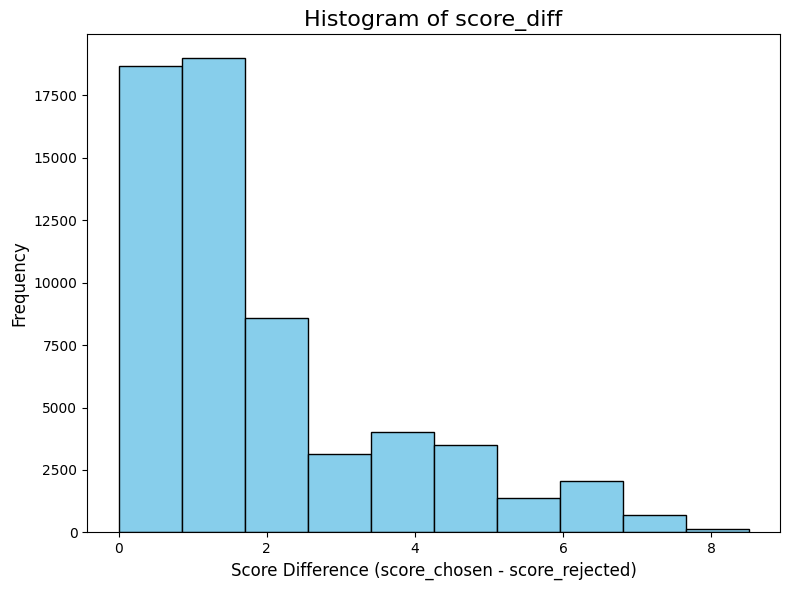

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
# 计算差值
score_diff = [chosen - rejected for chosen, rejected in zip(score_chosen, score_rejected)]
diff_counter = Counter(score_diff)
print(diff_counter)
# 画图
plt.figure(figsize=(8, 6))
plt.hist(score_diff, bins=10, color='skyblue', edgecolor='black')

plt.title("Histogram of score_diff", fontsize=16)
plt.xlabel("Score Difference (score_chosen - score_rejected)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
diff_counter

Counter({1.0: 11999,
         0.5: 11266,
         0.0: 7387,
         1.5: 6989,
         2.0: 5707,
         3.0: 3138,
         2.5: 2890,
         4.0: 2414,
         5.0: 1913,
         3.5: 1606,
         4.5: 1579,
         5.5: 1361,
         6.0: 1239,
         6.5: 809,
         7.0: 521,
         7.5: 173,
         8.0: 132,
         8.5: 7,
         5.300000000000001: 2,
         5.800000000000001: 1,
         4.300000000000001: 1,
         1.3000000000000007: 1})

In [9]:
from datasets import load_dataset, concatenate_datasets,DatasetDict

# raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']


raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']

score_diff = [chosen - rejected for chosen, rejected in zip(raw_dataset['score_chosen'], raw_dataset['score_rejected'])]



clean_dataset = raw_dataset.select(list(range(len(raw_dataset)-7387)))


new_dataset = DatasetDict({
    'train': clean_dataset,
    'test': load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['test'],
})


new_dataset.push_to_hub("jlpang888/ultrafeedback_sorted_score_diff_sft_combine")

Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/jlpang888/ultrafeedback_sorted_score_diff_sft_combine/commit/3960a314f01c833bdcc53f8d2f4df49e11177720', commit_message='Upload dataset', commit_description='', oid='3960a314f01c833bdcc53f8d2f4df49e11177720', pr_url=None, pr_revision=None, pr_num=None)

In [1]:
from datasets import load_dataset, concatenate_datasets,DatasetDict

# raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']


raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['train']


clean_dataset = raw_dataset.select(list(range(len(raw_dataset)-7387)))

identical_subset = raw_dataset.select(list(range(len(raw_dataset)-7387, len(raw_dataset))))


combined_dataset = concatenate_datasets([identical_subset, clean_dataset])

new_dataset = DatasetDict({
    'train': combined_dataset,
    'test': load_dataset("jlpang888/ultrafeedback_sorted_score_diff")['test'],
})


new_dataset.push_to_hub("jlpang888/ultrafeedback_sorted_score_diff_warmup")

/home/jlpang/QualityDPO/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/jlpang888/ultrafeedback_sorted_score_diff_warmup/commit/1dfc0a6143fad4ba252d619dfb71a39432a73dc5', commit_message='Upload dataset', commit_description='', oid='1dfc0a6143fad4ba252d619dfb71a39432a73dc5', pr_url=None, pr_revision=None, pr_num=None)

In [4]:
new_dataset['train'][7386]

{'prompt': 'how to direct chi during practising taiji',
 'prompt_id': '796e18cd2829edc3d65396a424e8f599ba63b8d069b837aedc8ef60a14830fc1',
 'chosen': [{'content': 'how to direct chi during practising taiji',
   'role': 'user'},
  {'content': 'Directing chi (also spelled as qi or ch\'i), the vital energy or life force within us, is an essential part of practicing Taiji (Tai Chi). To effectively direct chi during your practice, follow these tips and steps:\n\n1. **Relax and calm your mind**: Before starting your Taiji practice, find a quiet and peaceful spot. Close your eyes, take a few deep breaths, and clear your mind of any distractions. A relaxed and calm state of mind helps to direct and control the flow of chi more efficiently.\n\n2. **Maintain correct posture**: Proper body alignment is crucial in Taiji. Ensure your spine is straight, and your head is slightly raised as if suspended from above. Keep your shoulders relaxed and chest slightly concave. This posture allows for a smooth

## Explore the potential impact of score diff under different levels

In [10]:
from datasets import load_dataset, DatasetDict

# 加载数据
raw_dataset = load_dataset("jlpang888/ultrafeedback_sorted_score_diff")
train_dataset = raw_dataset["train"]
test_dataset = raw_dataset["test"]

# 计算 score_diff
score_diff = [chosen - rejected for chosen, rejected in zip(train_dataset['score_chosen'], train_dataset['score_rejected'])]
train_dataset = train_dataset.add_column("score_diff", score_diff)

# 按 score_diff 选子集
difficult_all = train_dataset.filter(lambda x: abs(x['score_diff']) < 0.5)
middle_all = train_dataset.filter(lambda x: 2 <= abs(x['score_diff']) < 3)
easy_all = train_dataset.filter(lambda x: abs(x['score_diff']) >= 5)

# 每类取 5000 个，并移除 score_diff 列
difficult_5k = difficult_all.shuffle(seed=42).select(range(5000)).remove_columns(['score_diff'])
middle_5k = middle_all.shuffle(seed=42).select(range(5000)).remove_columns(['score_diff'])
easy_5k = easy_all.shuffle(seed=42).select(range(5000)).remove_columns(['score_diff'])

# 构建 DatasetDict 并上传
DatasetDict({'train': difficult_5k, 'test': test_dataset}).push_to_hub("jlpang888/ultrafeedback_score_diff_difficult_5k")
DatasetDict({'train': middle_5k, 'test': test_dataset}).push_to_hub("jlpang888/ultrafeedback_score_diff_middle_5k")
DatasetDict({'train': easy_5k, 'test': test_dataset}).push_to_hub("jlpang888/ultrafeedback_score_diff_easy_5k")


Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/jlpang888/ultrafeedback_score_diff_easy_5k/commit/e2d5c58fcffdd35fb8985ca13a46bb561defcdaf', commit_message='Upload dataset', commit_description='', oid='e2d5c58fcffdd35fb8985ca13a46bb561defcdaf', pr_url=None, pr_revision=None, pr_num=None)